### Log File ###
https://docs.google.com/document/d/1J0BhavsaOvLj2zazWyO4EYncpshuRhhFoclmYcd55-A/edit


### Imports ###

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Remove display restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

### Read in File ###

In [2]:
# File path for file
file_path = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students.xlsx'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name='Conditional Admits')

### Get location of Counties ###

In [86]:
# Get distinct pairs of HS_STATE and HS_COUNTY
distinct_pairs = df[['HS_STATE', 'HS_COUNTY']].drop_duplicates()

display(distinct_pairs)

,HS_STATE,HS_COUNTY
0,NULL,Out of State
2,NJ,Ocean
4,NJ,Gloucester
5,NJ,Burlington
6,NJ,Middlesex
8,NJ,Atlantic
9,NJ,Camden
11,NJ,Monmouth
25,NULL,NULL
26,NJ,Bergen


In [24]:
# The coordinates for each county
coordinates = {
    ('NJ', 'Ocean'): (39.8359, -74.2029),
    ('NJ', 'Gloucester'): (39.7067, -75.1299),
    ('NJ', 'Burlington'): (39.8670, -74.6693),
    ('NJ', 'Middlesex'): (40.4279, -74.3960),
    ('NJ', 'Atlantic'): (39.4704, -74.4522),
    ('NJ', 'Camden'): (39.9259, -75.1196),
    ('NJ', 'Monmouth'): (40.2584, -74.1285),
    ('NJ', 'Bergen'): (40.9601, -74.0716),
    ('NJ', 'Cape May'): (39.0240, -74.9145),
    ('NJ', 'Cumberland'): (39.4070, -75.1719),
    ('NJ', 'Sussex'): (41.1381, -74.6912),
    ('NJ', 'Essex'): (40.7879, -74.3687),
    ('NJ', 'Mercer'): (40.2803, -74.7123),
    ('NJ', 'Hudson'): (40.7375, -74.0754),
    ('NJ', 'Union'): (40.6595, -74.2884),
    ('NJ', 'Salem'): (39.5560, -75.3316),
    ('NJ', 'Somerset'): (40.5656, -74.6704),
    ('NJ', 'Morris'): (40.8339, -74.6060),
    ('NJ', 'Passaic'): (41.0455, -74.2730),
    ('NJ', 'Warren'): (40.8597, -75.0037),
    ('NJ', 'Hunterdon'): (40.5795, -74.9160),
    ('DE', 'Out of State'): (39.1582, -75.5244),
    ('CT', 'Out of State'): (41.7637, -72.6851),
    ('NY', 'Out of State'): (42.6526, -73.7562),
    ('PA', 'Out of State'): (40.2698, -76.8756)
}

# Add latitude and longitude columns
df['HS_LAT'] = df.apply(
    lambda row: coordinates.get((row['HS_STATE'], row['HS_COUNTY']), (None, None))[0], axis=1)
df['HS_LONG'] = df.apply(
    lambda row: coordinates.get((row['HS_STATE'], row['HS_COUNTY']), (None, None))[1], axis=1)

# Find index of HS_COUNTY
county_index = df.columns.get_loc('HS_COUNTY')

# Insert HS_LAT and HS_LONG columns after it
df.insert(county_index + 1, 'HS_LAT', df.pop('HS_LAT'))
df.insert(county_index + 2, 'HS_LONG', df.pop('HS_LONG'))

# Fill null values with N
df['HOUSING_INTEREST'].fillna('N', inplace=True)
df['HOUS_DEP_PAID'].fillna('N', inplace=True)
df['FAFSA_IND'].fillna('N', inplace=True)

# Make all object into NULL and numerical into 0
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('null', inplace=True) 
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(0, inplace=True)

# Display the updated DataFrame
display(df)

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-23
1,132296,99,F,NaN,FX,Non-Resident,IE,2022-04-21,CSCI,CSCI,COND,18,Milestone College,Dhaka,NaN,Out of State,NaN,NaN,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,N,NaN,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,NaN,NaN,0,NaN,OCEAN COUNTY COLLEGE,NJ,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21
3,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,BIOL,BIOL-BS,COND,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will submit SAT or ACT scores,N,FGNN: Graduate school,NaN,N,N,NaN,Sierra Leone,2021-10-22
4,132778,15,F,NJ,FR,Caucasian or White,IE,2022-08-30,HLSC,HLTH-BS,COND,18,DELSEA REGIONAL HIGH SCHOOL,FRANKLINVILLE,NJ,Gloucester,39.7067,-75.1299,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,UGOFFN,N,Y,NaN,NaN,2022-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,124114,1,F,NJ,FR,More Than 1 Race,IE,2022-08-08,CSCI,CSCI,COND,25,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,N,FGNY: High School diploma or GED,UGWPN,N,Y,NaN,NaN,2022-07-29
371,132815,13,F,NJ,FR,Black or African American,IE,2022-05-01,HLSC,HLTH-BS,COND,18,NORTH STAR ACADEMY CHARTER,NEWARK,NJ,Essex,40.7879,-74.3687,F,540.0,510.0,1050,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,N,Y,NaN,NaN,2021-12-22
372,132463,1,F,NJ,FR,Hispanic or Latino,IE,2022-06-07,HLSC,HLTH-BS,COND,19,EGG HARBOR TOWNSHIP HS,EGG HARBOR TOWNSHIP,NJ,Atlantic,39.4704,-74.4522,F,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNY: Some college,REJISR,N,Y,NaN,NaN,2022-04-25
373,132421,1,F,NJ,FR,Caucasian or White,IE,2022-05-03,HLSC,HLTH-BS,COND,18,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,0,17.0,NaN,NaN,NaN,I will submit SAT or ACT scores,N,FGNY: Some college,UGWPN,N,Y,NaN,NaN,2022-04-13


### Save the file ###

In [72]:
output_file_path = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students Updated.xlsx'
df.to_excel(output_file_path, na_rep='NULL',index=False)

### Read in file, See if manupilations worked ###

In [74]:
# File path for file
file_path = '/Users/udoychowdhury/Documents/Assitantship/Conditionally Admitted Students Updated.xlsx'
# Read the Excel file
df = pd.read_excel(file_path)
# Make the null values into NULL
df.replace({pd.NA: 'NULL', pd.NaT: 'NULL'}, inplace=True)
# Disaply df
display(df)

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NULL,Out of State,0.0000,0.0000,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NULL,Y,N,NULL,Bangladesh,2022-03-23
1,132296,99,F,NULL,FX,Non-Resident,IE,2022-04-21,CSCI,CSCI,COND,18,Milestone College,Dhaka,NULL,Out of State,0.0000,0.0000,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NULL,Y,N,NULL,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,39.8359,-74.2029,M,0,0,0,0,OCEAN COUNTY COLLEGE,NJ,N,I will NOT submit SAT or ACT scores,HO,NULL,UGONN,Y,Y,NULL,NULL,2022-02-21
3,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,BIOL,BIOL-BS,COND,19,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,39.8359,-74.2029,F,0,0,0,0,NULL,NULL,N,I will submit SAT or ACT scores,N,FGNN: Graduate school,NULL,N,N,NULL,Sierra Leone,2021-10-22
4,132778,15,F,NJ,FR,Caucasian or White,IE,2022-08-30,HLSC,HLTH-BS,COND,18,DELSEA REGIONAL HIGH SCHOOL,FRANKLINVILLE,NJ,Gloucester,39.7067,-75.1299,F,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,UGOFFN,N,Y,NULL,NULL,2022-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,124114,1,F,NJ,FR,More Than 1 Race,IE,2022-08-08,CSCI,CSCI,COND,25,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,M,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,N,FGNY: High School diploma or GED,UGWPN,N,Y,NULL,NULL,2022-07-29
371,132815,13,F,NJ,FR,Black or African American,IE,2022-05-01,HLSC,HLTH-BS,COND,18,NORTH STAR ACADEMY CHARTER,NEWARK,NJ,Essex,40.7879,-74.3687,F,540,510,1050,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,NULL,UGONN,N,Y,NULL,NULL,2021-12-22
372,132463,1,F,NJ,FR,Hispanic or Latino,IE,2022-06-07,HLSC,HLTH-BS,COND,19,EGG HARBOR TOWNSHIP HS,EGG HARBOR TOWNSHIP,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,NULL,NULL,N,I will NOT submit SAT or ACT scores,HO,FGNY: Some college,REJISR,N,Y,NULL,NULL,2022-04-25
373,132421,1,F,NJ,FR,Caucasian or White,IE,2022-05-03,HLSC,HLTH-BS,COND,18,NULL,NULL,NULL,NULL,0.0000,0.0000,F,0,0,0,17,NULL,NULL,N,I will submit SAT or ACT scores,N,FGNY: Some college,UGWPN,N,Y,NULL,NULL,2022-04-13


### Check Data Types ###

In [33]:
df.dtypes

ID                            int64
SPRADDR_CNTY_CODE             int64
SARADAP_STYP_CODE_2          object
SPRADDR_STAT_CODE            object
SARADAP_ADMT_CODE            object
ETHNICITY                    object
SARAPPD_APDC_CODE            object
SARAPPD_APDC_DATE            object
SARADAP_MAJR_CODE_1          object
SARADAP_PROGRAM_1            object
SARADAP_MAJR_CODE_CONC_1     object
AGE                           int64
HS_NAME                      object
HS_CITY                      object
HS_STATE                     object
HS_COUNTY                    object
HS_LAT                      float64
HS_LONG                     float64
SPBPERS_SEX                  object
SAT_MATH                      int64
SAT_ERBW                      int64
SAT_TOTAL                     int64
ACT_COMPOSITE                 int64
COL_DESC                     object
COL_STATE                    object
DCHS_IND                     object
REC_TEST_PLAN                object
HOUSING_INTEREST            

### Cramers V ###

In [84]:
def calculate_cramers_v(x, y):
    # Create a contingency table from two Series, x and y
    contingency_table = pd.crosstab(x, y)
    
    # Calculate the chi-squared test statistic and p-value
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
    
    # Total observations
    N = np.sum(contingency_table.values)
    
    # Minimum dimension minus one (for Cramer's V formula)
    min_dim = min(contingency_table.shape) - 1
    
    # Cramer's V calculation
    result = np.sqrt((chi2 / N) / min_dim)
    
    return result

def cramer_v_for_all_vars(df, y_var):
    results = [{'Variable': y_var, 'Cramers_V': 1.0}]  # Assuming perfect association of y_var with itself
    for col in df.columns:
        if col != 'ID':  
            x = df[col]
            y = df[y_var]
            cramers_v_value = calculate_cramers_v(x, y)
            results.append({'Variable': col, 'Cramers_V': cramers_v_value})
    return pd.DataFrame(results)


y_variable = 'ETHNICITY'
results_df = cramer_v_for_all_vars(df, y_variable)

results_df

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_14383/3780974041.py:15: RuntimeWarning:

invalid value encountered in double_scalars



,Variable,Cramers_V
0,ETHNICITY,1.000000
1,SPRADDR_CNTY_CODE,0.331347
2,SARADAP_STYP_CODE_2,NaN
3,SPRADDR_STAT_CODE,0.265583
4,SARADAP_ADMT_CODE,0.425931
5,ETHNICITY,1.000000
6,SARAPPD_APDC_CODE,0.102564
7,SARAPPD_APDC_DATE,0.511704
8,SARADAP_MAJR_CODE_1,0.196208
9,SARADAP_PROGRAM_1,0.218586


In [15]:
# Plotting
fig = px.scatter(results_df, x='Variable', y='Cramers_V', color='Cramers_V',
                 title="Cramer's V Across Variables")
fig.update_layout(height=800)
fig.show()

### Pearson Coefficient ###

Pearson correlation coefficient: -0.07


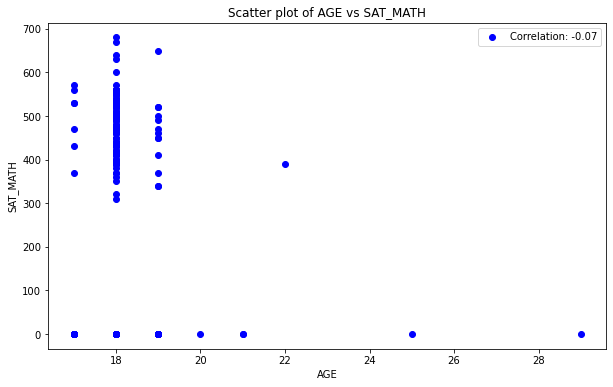

In [77]:
# Calculate Pearson correlation
corr, p_value = pearsonr(df['AGE'], df['SAT_MATH'])
print(f'Pearson correlation coefficient: {corr:.2f}')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['SAT_MATH'], color='blue', label=f'Correlation: {corr:.2f}')
plt.title('Scatter plot of AGE vs SAT_MATH')
plt.xlabel('AGE')
plt.ylabel('SAT_MATH')
plt.legend()
plt.show()


### Anova Test ###

ANOVA test results: F=3.3952295362053735, p=0.0015829612674988208


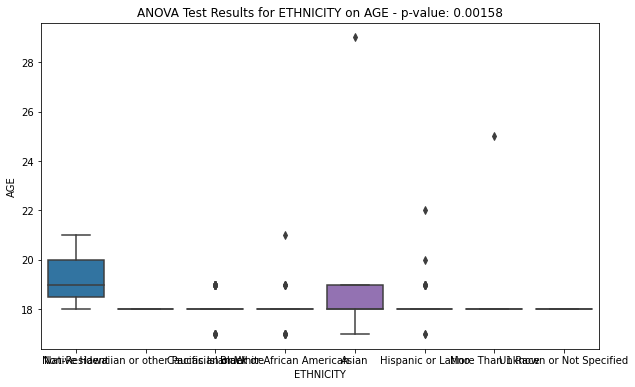

In [81]:
x = 'ETHNICITY'
y ='AGE'

# Perform ANOVA
groups = df.groupby(x)[y].apply(list)
f_val, p_val = stats.f_oneway(*groups)

# Print ANOVA results
print(f"ANOVA test results: F={f_val}, p={p_val}")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=df)
plt.title(f'ANOVA Test Results for {x} on {y} - p-value: {p_val:.5f}')
plt.show()